# ANÁLISIS BIVARIANTE

El análisis bivariante se utiliza para examinar la relación o asociación entre dos variables en un conjunto de datos.

El análisis bivariante puede ser útil para:

1. Identificar correlaciones: El análisis bivariante permite determinar si existe una relación entre dos variables y si esa relación es positiva, negativa o no existe. Esto puede ayudar a comprender cómo una variable afecta a la otra y a identificar patrones o tendencias.

2. Realizar pruebas de hipótesis: El análisis bivariante puede usarse para evaluar si hay diferencias significativas entre dos grupos o categorías en función de una variable. Esto puede ayudar a determinar si una variable tiene un impacto estadísticamente significativo en otra variable.

3. Visualizar la relación: El análisis bivariante a menudo se representa mediante gráficos, como gráficos de dispersión, diagramas de cajas y bigotes, o gráficos de barras. Estos gráficos permiten visualizar la relación entre las dos variables y pueden revelar patrones o tendencias visuales.

4. Predecir valores: El análisis bivariante puede ayudar a predecir valores de una variable en función de otra variable. 

## 1. Importar librerías

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
import locale

import warnings
# Suprimir los warnings
warnings.filterwarnings('ignore')

## 2. Cargar datos

In [6]:
ruta = '../data/calidad_clean_outliers.csv'
df = pd.read_csv(ruta, sep=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [7]:
df['ANO'] = df['ANO'].astype(int)
df['MES'] = df['MES'].astype(int)
df['DIA'] = df['DIA'].astype(int)
df['HORA'] = df['HORA'].astype(int)

## 3. Análisis Bivariante

En este apartado se analizará la variación del ICA, según los siguientes criterios:

* Por Estaciones del Año (Primavera, Verano, Otoño, Invierno)
* Por Distribución Horaria (Punta, Valle, LLana)
* Por Tipo de Día (Laborable, Festivo, Vispera Festivo)

#### 3.1 Gráficos de Dispersión

* Analizar la relación de ICA con el resto de contaminantes atmósfericos y con los datos metereológicos

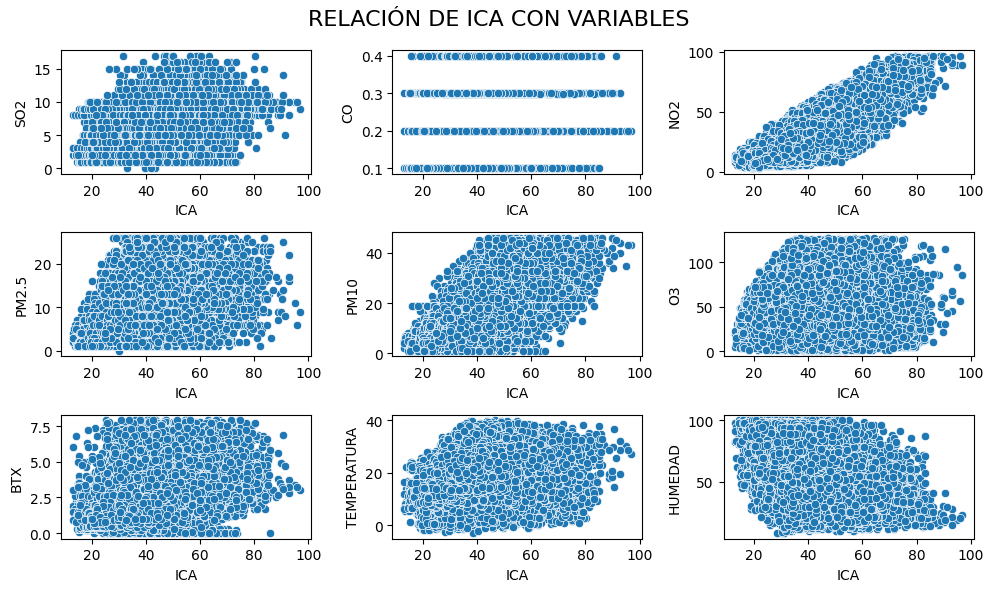

In [8]:
selected_columns = ['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD']

num_plots = len(selected_columns)
num_cols = 3
num_rows = (num_plots + 1) // num_cols  # División entera redondeada hacia arriba

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

for i, column in enumerate(selected_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.scatterplot(data=df, x=df['ICA'], y=column, ax=ax)

    ax.set_xlabel('ICA')
    ax.set_ylabel(column)

    
# Eliminar subparcelas vacías si es necesario
if num_plots % num_cols != 0:
    fig.delaxes(axes[-1, -1])

# Agregar título general a la figura
plt.suptitle('RELACIÓN DE ICA CON VARIABLES', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=1)

plt.tight_layout()
plt.show()